In [109]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [110]:
#from google.colab import drive
#drive.mount('/content/drive')

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [112]:
df=pd.read_csv(r"C:\Users\Geetesh\Videos\Desktop\project\Data\counterfeit_train.csv")

In [113]:
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [114]:
df.shape

(6818, 12)

In [115]:
df.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [116]:
for col in df.columns:
  print("==={}===".format(col))
  print(df[col].value_counts())

===Medicine_ID===
SCK30    9
HQH91    9
OQH15    9
RQS74    9
QLK14    9
KIS14    9
HHY36    8
VUG26    8
HHZ13    8
SGZ11    8
SKK32    8
YEN19    8
GVZ23    8
QIN25    8
UMX23    8
CTJ12    8
PPX12    8
WKS47    8
KIC54    8
USQ94    8
HQQ45    8
RRH53    8
IDG55    8
KJA29    8
RVF12    8
DZM40    8
OXK54    8
NQY36    8
NBV27    8
NCN78    8
        ..
ZVH10    1
PPB10    1
RLS13    1
PIG89    1
YYX14    1
HFF15    1
QGU83    1
JTW13    1
WGC12    1
ADE15    1
DCV26    1
SXA15    1
WET13    1
WTA87    1
YLQ15    1
HBG12    1
ETU15    1
FUN14    1
OPM10    1
FVS71    1
JPO54    1
WEX14    1
UKN13    1
XSM88    1
BIY14    1
HOA15    1
KGC13    1
LVI11    1
QMP15    1
JNE88    1
Name: Medicine_ID, Length: 1557, dtype: int64
===Counterfeit_Weight===
13.450    72
18.900    67
13.100    65
18.000    55
14.950    55
11.800    54
16.400    52
20.650    52
10.600    51
19.050    51
20.900    51
22.000    50
19.550    49
16.300    48
18.050    48
17.300    48
12.900    47
19.000    47
17.150

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
Medicine_ID            6818 non-null object
Counterfeit_Weight     5652 non-null float64
DistArea_ID            6818 non-null object
Active_Since           6818 non-null int64
Medicine_MRP           6818 non-null float64
Medicine_Type          6818 non-null object
SidEffect_Level        6818 non-null object
Availability_rating    6818 non-null float64
Area_Type              6818 non-null object
Area_City_Type         6818 non-null object
Area_dist_level        6818 non-null object
Counterfeit_Sales      6818 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [118]:
df.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [119]:
pd.DataFrame(list(zip(df.mean(),df.median())),columns=["Mean","Median"]) 

,Mean,Median
0,14.115057,13.800000
1,1995.836316,1997.000000
2,151.401518,153.195700
3,0.079174,0.066955
4,2280.583480,1902.670400


In [120]:
is_null_val=[col for col in df.columns if(df[col].isnull().sum()>1)]

In [121]:
print(is_null_val)
for col in is_null_val:
  print(col,df[col].isnull().mean())

['Counterfeit_Weight']
Counterfeit_Weight 0.17101789381050161


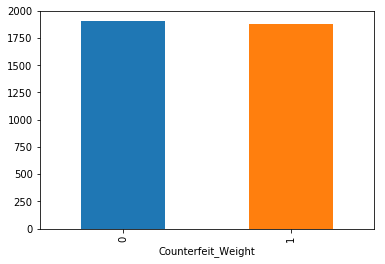

In [122]:
for col in is_null_val:
  data=df.copy()
  data[col]=np.where(df[col].isnull(),1,0)
  data.groupby(col)["Counterfeit_Sales"].median().plot.bar()
  plt.show()

In [123]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!="O" and feature not in "Active_Since"]

In [124]:
print(numerical_feature)
for col in numerical_feature:
  print(col,len(df[col].unique()))

['Counterfeit_Weight', 'Medicine_MRP', 'Availability_rating', 'Counterfeit_Sales']
Counterfeit_Weight 415
Medicine_MRP 5097
Availability_rating 6317
Counterfeit_Sales 3142


In [125]:
for col in numerical_feature:
  print("==={}==".format(col))
  print(df[col].value_counts())

===Counterfeit_Weight==
13.450    72
18.900    67
13.100    65
18.000    55
14.950    55
11.800    54
16.400    52
20.650    52
10.600    51
19.050    51
20.900    51
22.000    50
19.550    49
16.300    48
18.050    48
17.300    48
12.900    47
19.000    47
17.150    47
11.100    46
13.900    45
11.495    45
13.800    45
12.800    44
13.400    44
21.500    43
20.150    43
21.000    43
17.000    42
21.550    41
          ..
10.335     2
10.470     2
10.100     2
6.205      2
9.150      2
9.575      2
7.605      2
9.415      2
7.705      2
7.625      2
7.185      2
6.605      2
8.985      1
10.720     1
8.905      1
7.820      1
8.075      1
6.105      1
8.860      1
9.190      1
9.650      1
6.975      1
8.575      1
7.035      1
10.220     1
6.510      1
7.395      1
6.700      1
8.195      1
8.060      1
Name: Counterfeit_Weight, Length: 414, dtype: int64
===Medicine_MRP==
152.3154    6
182.3422    5
137.4020    5
131.1756    5
119.8228    5
59.1376     5
180.8422    5
184.3422    4
1

Text(0.5,1,'Active_Since Vs Counterfit_sales')

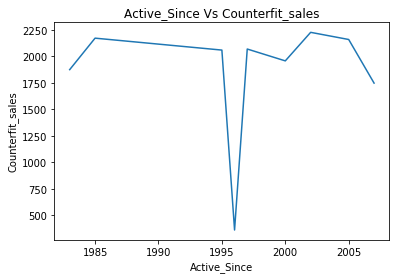

In [126]:
df.groupby("Active_Since")["Counterfeit_Sales"].median().plot()
plt.xlabel("Active_Since")
plt.ylabel("Counterfit_sales")
plt.title("Active_Since Vs Counterfit_sales")

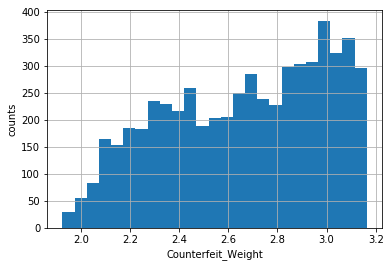

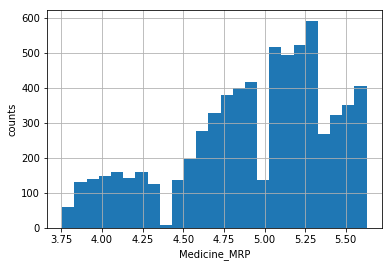

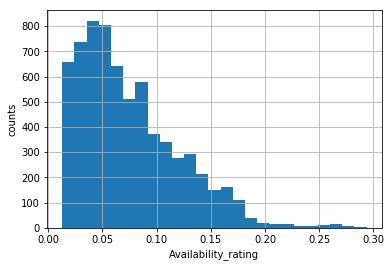

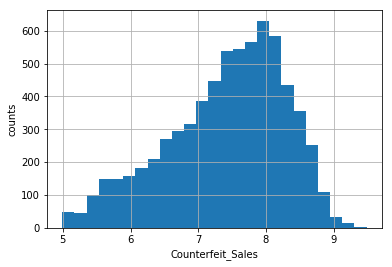

In [127]:
for col in numerical_feature:
    data=df.copy()
    if  0 in data[col].unique():
        pass
    else:
        data[col]=np.log(data[col]+1)
        data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.show()

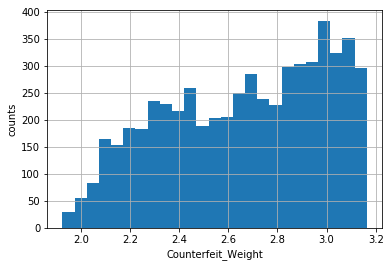

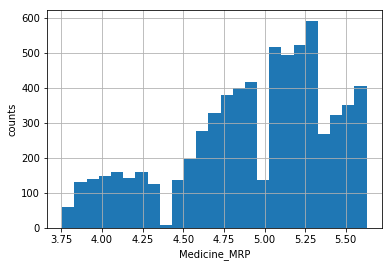

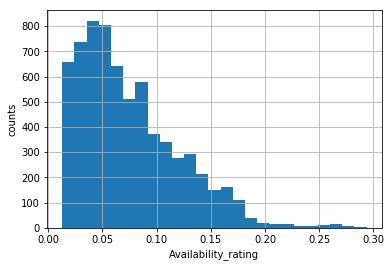

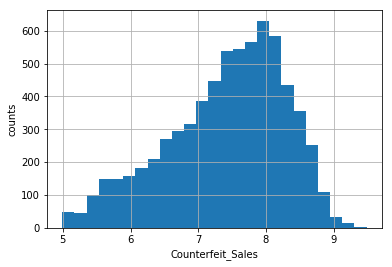

In [128]:
for col in numerical_feature:
    if  0 in df[col].unique():
        pass
    else:
        df[col]=np.log(df[col]+1)
        df[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.show()

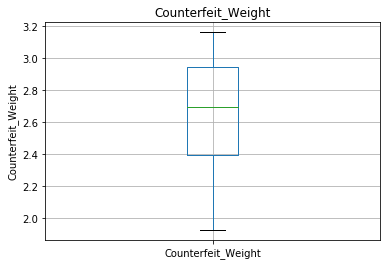

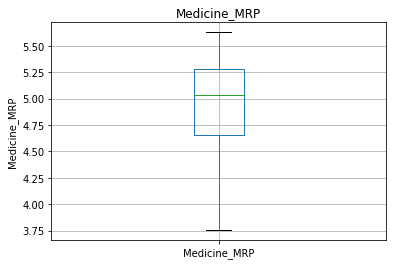

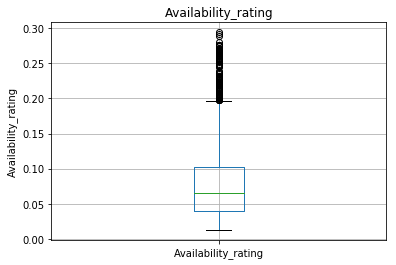

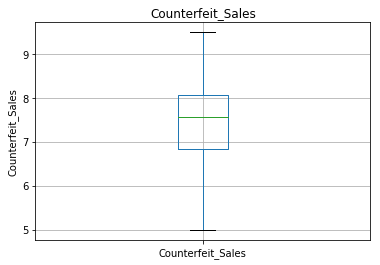

In [129]:
for col in numerical_feature:
  df.boxplot(column=col)
  plt.ylabel(col)
  plt.title(col)
  plt.show()

In [130]:
categorical_feature=[feature for feature in df.columns if(df[feature].dtypes=="O" and feature not in ["Medicine_ID"])]
print(categorical_feature)

['DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level']


In [131]:
df[categorical_feature].head()

,DistArea_ID,Medicine_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level
0,Area046,Antimalarial,critical,DownTown,Tier 1,Small
1,Area027,Mstablizers,mild,CityLimits,Tier 3,Medium
2,Area046,Cardiac,mild,DownTown,Tier 1,Small
3,Area046,OralContraceptives,mild,DownTown,Tier 1,Small
4,Area019,Hreplacements,critical,MidTownResidential,Tier 1,Small


In [132]:
for col in categorical_feature:
  print("==={}====".format(col))
  print("=={}===length =={}===".format(df[col].value_counts(),len(df[col].unique())))

===DistArea_ID====
==Area017    760
Area013    749
Area046    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64===length ==10===
===Medicine_Type====
==Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64===length ==16===
===SidEffect_Level====
==mild        4434
critical    2384
Name: SidEffect_Level, dtype: int64===length ==2===
===Area_Type====
==DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64===length ==4===
===Are

In [133]:
df["SidEffect_Level"]=pd.to_numeric(np.where(df["SidEffect_Level"]=="mild",1,0))

In [134]:
df["SidEffect_Level"].dtype

dtype('int32')

In [135]:
df.select_dtypes(["object"])

,Medicine_ID,DistArea_ID,Medicine_Type,Area_Type,Area_City_Type,Area_dist_level
0,RRA15,Area046,Antimalarial,DownTown,Tier 1,Small
1,YVV26,Area027,Mstablizers,CityLimits,Tier 3,Medium
2,LJC15,Area046,Cardiac,DownTown,Tier 1,Small
3,GWC40,Area046,OralContraceptives,DownTown,Tier 1,Small
4,QMN13,Area019,Hreplacements,MidTownResidential,Tier 1,Small
5,JDG81,Area045,Antiseptics,DownTown,Tier 2,Unknown
6,KPX48,Area018,Hreplacements,Industrial,Tier 3,Medium
7,CYW14,Area013,Antiseptics,DownTown,Tier 3,High
8,TVF57,Area046,Hreplacements,DownTown,Tier 1,Small
9,MGU75,Area013,Statins,DownTown,Tier 3,High


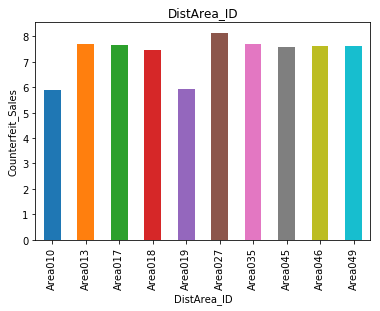

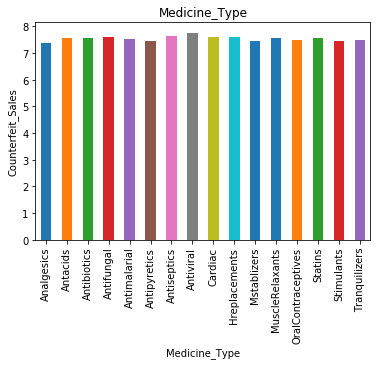

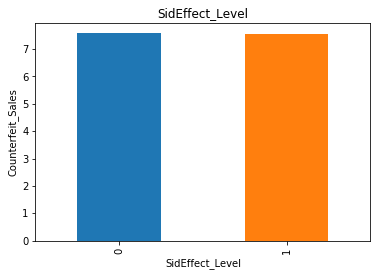

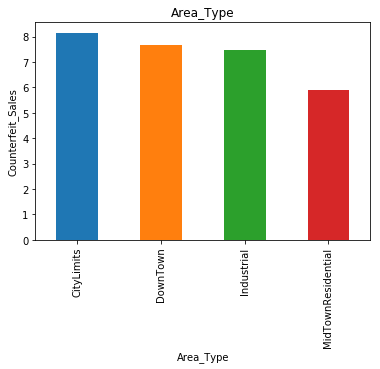

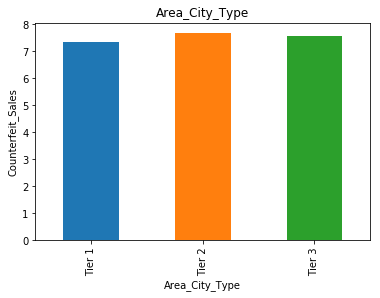

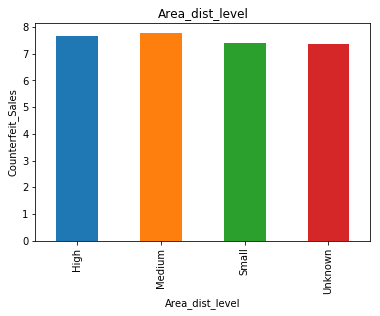

In [136]:
for col in categorical_feature:
  data=df.copy()
  data.groupby(col)["Counterfeit_Sales"].median().plot.bar()
  plt.xlabel(col)
  plt.ylabel("Counterfeit_Sales")
  plt.title(col)
  plt.show()

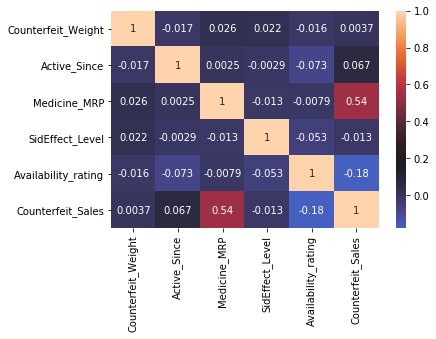

In [137]:
sns.heatmap(df.corr(),center=0.2,annot=True)

 **Feature Engineering**

In [138]:
df[categorical_feature].isnull().sum()

DistArea_ID        0
Medicine_Type      0
SidEffect_Level    0
Area_Type          0
Area_City_Type     0
Area_dist_level    0
dtype: int64

In [139]:
df.drop("Medicine_ID",axis=1,inplace=True)

In [140]:
for col in df.select_dtypes(["object"]).columns:
  dummy=pd.get_dummies(df[col],prefix=col,drop_first=True)
  df=pd.concat([df,dummy],axis=1)
  del df[col]
  print(col)
del dummy

DistArea_ID
Medicine_Type
Area_Type
Area_City_Type
Area_dist_level


In [141]:
df.isnull().sum()

Counterfeit_Weight                  1166
Active_Since                           0
Medicine_MRP                           0
SidEffect_Level                        0
Availability_rating                    0
Counterfeit_Sales                      0
DistArea_ID_Area013                    0
DistArea_ID_Area017                    0
DistArea_ID_Area018                    0
DistArea_ID_Area019                    0
DistArea_ID_Area027                    0
DistArea_ID_Area035                    0
DistArea_ID_Area045                    0
DistArea_ID_Area046                    0
DistArea_ID_Area049                    0
Medicine_Type_Antacids                 0
Medicine_Type_Antibiotics              0
Medicine_Type_Antifungal               0
Medicine_Type_Antimalarial             0
Medicine_Type_Antipyretics             0
Medicine_Type_Antiseptics              0
Medicine_Type_Antiviral                0
Medicine_Type_Cardiac                  0
Medicine_Type_Hreplacements            0
Medicine_Type_Ms

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
train, test=train_test_split(df,test_size=0.2,random_state=10)

In [144]:
for col in train.columns:
    if((train[col].isnull().sum()>1) and col not in ["Counterfeit_Sales"]):
        train.loc[train[col].isnull(),col]=train[col].median()

C:\Users\Geetesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [145]:
for col in test.columns:
    if((test[col].isnull().sum()>1) and col not in ["Counterfeit_Sales"]):
        test.loc[test[col].isnull(),col]=train[col].median()

C:\Users\Geetesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [146]:
x_train=train.drop("Counterfeit_Sales",axis=1)
y_train=train["Counterfeit_Sales"]
x_test=test.drop("Counterfeit_Sales",axis=1)
y_test=test["Counterfeit_Sales"]

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
lm=LinearRegression()

In [149]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
lm.intercept_

2724004384557.5366

In [151]:
list(zip(x_train.columns,lm.coef_))

[('Counterfeit_Weight', -0.018553050647673874),
 ('Active_Since', -1367683207.3521602),
 ('Medicine_MRP', 1.010754555463791),
 ('SidEffect_Level', -0.01851850003004074),
 ('Availability_rating', -0.10259024437982589),
 ('DistArea_ID_Area013', -9811837108.754742),
 ('DistArea_ID_Area017', 2611893311.018081),
 ('DistArea_ID_Area018', 10987190303.530655),
 ('DistArea_ID_Area019', -10700195111.769075),
 ('DistArea_ID_Area027', -11922882676.25199),
 ('DistArea_ID_Area035', 7080323654.991087),
 ('DistArea_ID_Area045', -4226522725.804021),
 ('DistArea_ID_Area046', 2978224768.313046),
 ('DistArea_ID_Area049', 3582476313.8211207),
 ('Medicine_Type_Antacids', 0.018429506570100784),
 ('Medicine_Type_Antibiotics', -0.018030956387519836),
 ('Medicine_Type_Antifungal', -0.06566580571234226),
 ('Medicine_Type_Antimalarial', -0.028878627344965935),
 ('Medicine_Type_Antipyretics', -0.04091380164027214),
 ('Medicine_Type_Antiseptics', -0.013949858024716377),
 ('Medicine_Type_Antiviral', 0.09422641899436

In [152]:
from sklearn.metrics import mean_absolute_error

In [153]:
mean_absolute_error(y_train,lm.predict(x_train))

0.3536985870616927

In [154]:
mae=mean_absolute_error(y_test,lm.predict(x_test))
print(mae)

0.35793990068392884


In [155]:
score=1-(mae/1660)
print(score)

0.9997843735538049


In [156]:
from sklearn.metrics import r2_score

In [157]:
predicted=lm.predict(x_test)

In [158]:
r2_score(y_test,predicted)

0.7056141253190771

In [159]:
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [160]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [161]:
alphas = np.linspace(0.001, 1, 100)
rmse_list = []
for a in alphas:
    ridge = Ridge(fit_intercept=True, alpha=a)
    # 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_error = 0
    for train_, test_ in kf.split(x_train):
        ridge.fit(x_train.loc[train_], y_train[train_])
        p = ridge.predict(x_train.loc[test_])
        err = p - y_train[test_]
        xval_error += np.dot(err, err)
    rmse_10cv = np.sqrt(xval_error/len(x_train))
    rmse_list.extend([rmse_10cv])
best_alpha = alphas[rmse_list == min(rmse_list)]
print("Alpha with min 10cv error is: ", best_alpha)

Alpha with min 10cv error is:  [1.]


In [162]:
ridge = Ridge(fit_intercept=True, alpha=best_alpha)
ridge.fit(x_train, y_train)
p_test = ridge.predict(x_test)
test_err = p_test - y_test
rmse_ridge = np.sqrt(np.dot(test_err, test_err)/len(p_test))
rmse_ridge

0.46201319248194295

In [163]:
alphas = np.linspace(0.00099, 0.1, 100)
rmse_list = []
for a in alphas:
    lasso = Lasso(fit_intercept=True, alpha=a)
    # 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_error = 0
    for train_, test_ in kf.split(x_train):
        lasso.fit(x_train.loc[train_], y_train[train_])
        p = lasso.predict(x_train.loc[test_])
        err = p - y_train[test_]
        xval_error += np.dot(err, err)
    rmse_10cv = np.sqrt(xval_error/len(x_train))
    rmse_list.extend([rmse_10cv])
best_alpha = alphas[rmse_list == min(rmse_list)]
print("Alpha with min 10cv error is: ", best_alpha)

Alpha with min 10cv error is:  [0.0019901]


In [164]:
lasso = Lasso(fit_intercept=True, alpha=best_alpha)
lasso.fit(x_train, y_train)
p_test = lasso.predict(x_test)
test_err = p_test - y_test
rmse_lasso = np.sqrt(np.dot(test_err, test_err)/len(p_test))
rmse_lasso

0.460737325245262

In [165]:
lasso.intercept_

2.7250414278315374

In [166]:
list(zip(x_train.columns,lasso.coef_))

[('Counterfeit_Weight', -0.0),
 ('Active_Since', -0.0001104019926286635),
 ('Medicine_MRP', 1.0007823278065309),
 ('SidEffect_Level', -0.005585941282402943),
 ('Availability_rating', -0.0),
 ('DistArea_ID_Area013', -0.0),
 ('DistArea_ID_Area017', 0.006240672970611788),
 ('DistArea_ID_Area018', -0.0),
 ('DistArea_ID_Area019', -0.0),
 ('DistArea_ID_Area027', 0.6312072874336638),
 ('DistArea_ID_Area035', 0.01325753267113784),
 ('DistArea_ID_Area045', -0.0187543983430844),
 ('DistArea_ID_Area046', -0.0),
 ('DistArea_ID_Area049', 0.0),
 ('Medicine_Type_Antacids', 0.0),
 ('Medicine_Type_Antibiotics', -0.0),
 ('Medicine_Type_Antifungal', -0.0),
 ('Medicine_Type_Antimalarial', -0.0),
 ('Medicine_Type_Antipyretics', -0.0024912952353179393),
 ('Medicine_Type_Antiseptics', -0.0),
 ('Medicine_Type_Antiviral', 0.0),
 ('Medicine_Type_Cardiac', 0.0),
 ('Medicine_Type_Hreplacements', 0.0),
 ('Medicine_Type_Mstablizers', -0.0),
 ('Medicine_Type_MuscleRelaxants', 0.0),
 ('Medicine_Type_OralContraceptive

In [167]:
data=pd.DataFrame(list(zip(x_train.columns,lasso.coef_)),columns=["Columns_Name","Values"])

In [168]:
new_val=df[data[data["Values"]!=0]["Columns_Name"]]

In [169]:
new_val.shape

(6818, 13)

In [170]:
new_val["Counterfeit_Sales"]=df["Counterfeit_Sales"]

C:\Users\Geetesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [171]:
new_val

,Active_Since,Medicine_MRP,SidEffect_Level,DistArea_ID_Area017,DistArea_ID_Area027,DistArea_ID_Area035,DistArea_ID_Area045,Medicine_Type_Antipyretics,Area_Type_DownTown,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Counterfeit_Sales
0,1995,5.082873,0,0,0,0,0,0,1,0,0,0,0,7.482402
1,1983,4.713472,1,0,1,0,0,0,0,0,0,1,1,8.029482
2,1995,5.562254,1,0,0,0,0,0,1,0,0,0,0,7.864839
3,1995,4.614952,1,0,0,0,0,0,1,0,0,0,0,7.005529
4,1983,4.050744,0,0,0,0,0,0,0,1,0,0,0,5.074800
5,2000,5.115389,1,0,0,0,1,0,1,0,1,0,0,8.022519
6,2007,5.062027,0,0,0,0,0,0,0,0,0,1,1,7.967070
7,1985,5.045661,1,0,0,0,0,0,1,0,0,1,0,8.090474
8,1995,4.684968,0,0,0,0,0,0,1,0,0,0,0,7.581174
9,1985,5.088455,1,0,0,0,0,0,1,0,0,1,0,8.038119


In [172]:
train_,test_=train_test_split(new_val,test_size=0.2,random_state=10)

In [173]:
x_train_=train_.drop("Counterfeit_Sales",axis=1)
y_train_=train_["Counterfeit_Sales"]
x_test_=test_.drop("Counterfeit_Sales",axis=1)
y_test_=test_["Counterfeit_Sales"]

In [174]:
lm.fit(x_train_,y_train_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [175]:
mean_absolute_error(y_train_,lm.predict(x_train_))

0.35392140689243323

In [176]:
mae=mean_absolute_error(y_test_,lm.predict(x_test_))

In [177]:
score=1-(mae/1660)
print(score)

0.9997848352269247


In [178]:
r2_score(y_test_,lm.predict(x_test_))

0.7069943065615587

In [179]:
df_test=pd.read_csv(r"C:\Users\Geetesh\Videos\Desktop\project\Data\counterfeit_test.csv")

In [180]:
df_test.shape

(1705, 11)

In [181]:
df_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


In [182]:
is_null_val=[col for col in df_test.columns if(df_test[col].isnull().sum()>1)]

In [183]:
numerical_feature=[feature for feature in df_test.columns if(df_test[feature].dtypes!="O" and feature not in ["Active_Since"])]

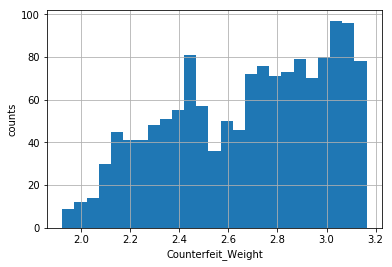

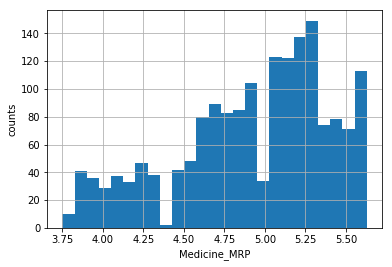

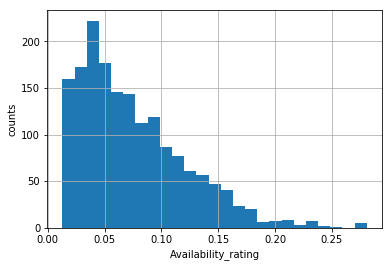

In [184]:
for col in numerical_feature:
    if  0 in df_test[col].unique():
        pass
    else:
        df_test[col]=np.log(df_test[col]+1)
        df_test[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.show()

In [185]:
categorical_feature=[feature for feature in df_test.columns if(df_test[feature].dtypes=="O" and feature not in ["Medicine_ID"])]
print(categorical_feature)

['DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level']


In [186]:
df_test["SidEffect_Level"]=pd.to_numeric(np.where(df_test["SidEffect_Level"]=="mild",1,0))

In [187]:
df_test.drop(["Medicine_ID"],axis=1,inplace=True) 

In [188]:
for col in df_test.select_dtypes(["object"]).columns:
  dummy=pd.get_dummies(df_test[col],prefix=col,drop_first=True)
  df_test=pd.concat([df_test,dummy],axis=1)
  del df_test[col]
  print(col)
del dummy

DistArea_ID
Medicine_Type
Area_Type
Area_City_Type
Area_dist_level


In [189]:
df_test.shape

(1705, 37)

In [190]:
for col in df_test.columns:
    if(df_test[col].isnull().sum()>1):
        df_test.loc[df_test[col].isnull(),col]=df_test[col].median()

In [191]:
new_data=x_train_.columns
print(new_data)
print(new_data.shape)

Index(['Active_Since', 'Medicine_MRP', 'SidEffect_Level',
       'DistArea_ID_Area017', 'DistArea_ID_Area027', 'DistArea_ID_Area035',
       'DistArea_ID_Area045', 'Medicine_Type_Antipyretics',
       'Area_Type_DownTown', 'Area_Type_MidTownResidential',
       'Area_City_Type_Tier 2', 'Area_City_Type_Tier 3',
       'Area_dist_level_Medium'],
      dtype='object')
(13,)


In [192]:
new_df=df_test[new_data]

In [193]:
predict=lm.predict(new_df)

In [194]:
pd.DataFrame(list(zip(predict)))

,0
0,7.606021
1,8.181877
2,7.184274
3,5.950789
4,5.794531
5,6.292684
6,8.268795
7,8.064713
8,8.576083
9,7.258652
